In [39]:
import numpy as np
from numpy import median
from numpy import sum 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns

In [40]:
data = pd.read_csv('/Users/arslanaliawan/Desktop/scripts/HNPS/suicidal/who_suicide_statistics.csv')

In [41]:
data.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0


In [42]:
data.tail()

,country,year,sex,age,suicides_no,population
43771,Zimbabwe,1990,male,25-34 years,150.0,NaN
43772,Zimbabwe,1990,male,35-54 years,132.0,NaN
43773,Zimbabwe,1990,male,5-14 years,6.0,NaN
43774,Zimbabwe,1990,male,55-74 years,74.0,NaN
43775,Zimbabwe,1990,male,75+ years,13.0,NaN


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
country        43776 non-null object
year           43776 non-null int64
sex            43776 non-null object
age            43776 non-null object
suicides_no    41520 non-null float64
population     38316 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


In [44]:
data.shape

(43776, 6)

In [45]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population'], dtype='object')

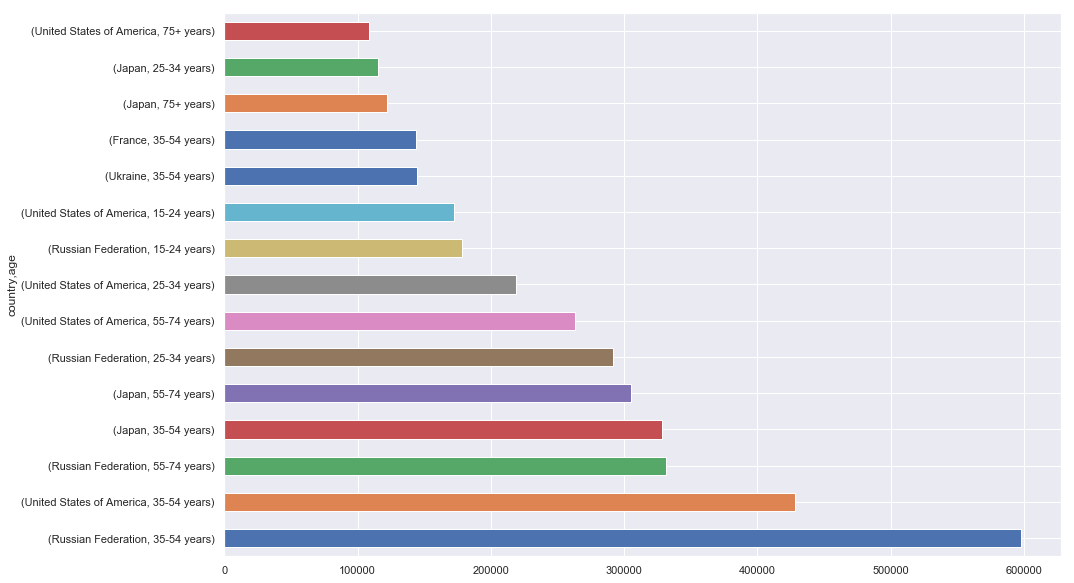

In [46]:
data.groupby(['country','age']).suicides_no.sum().nlargest(15).plot(kind='barh')

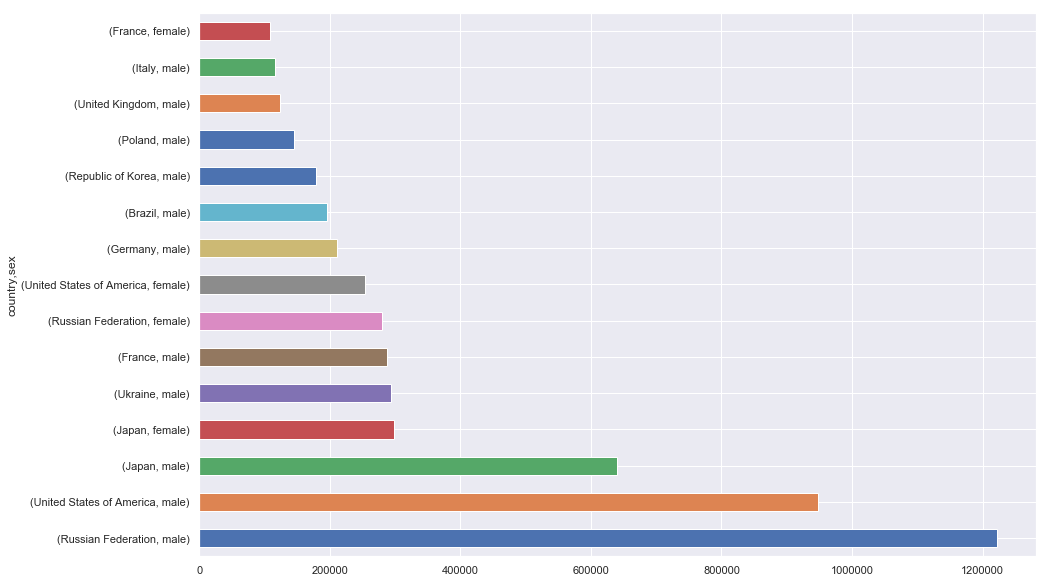

In [47]:
data.groupby(['country','sex']).suicides_no.sum().nlargest(15).plot(kind='barh')

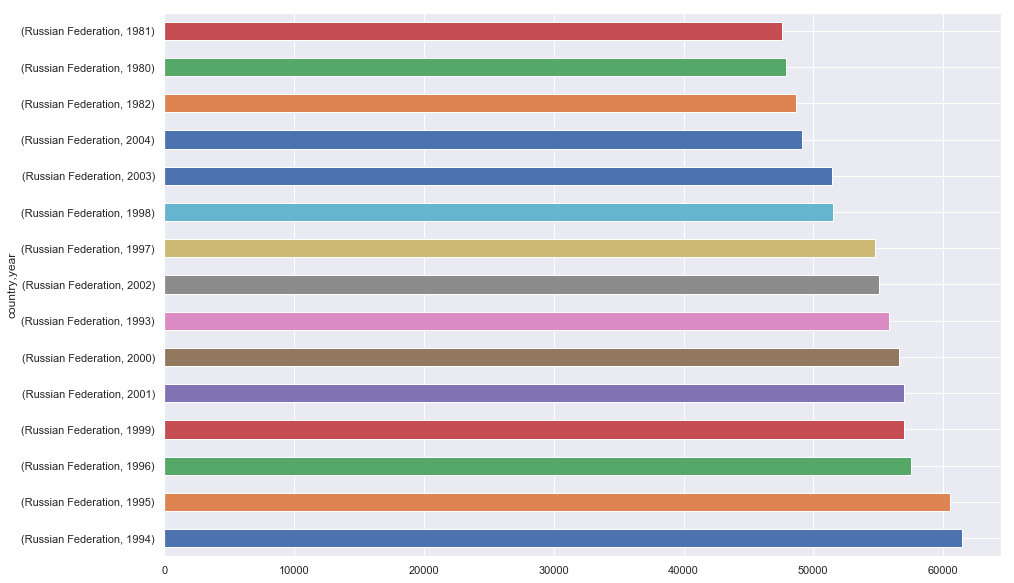

In [48]:
data.groupby(['country','year']).suicides_no.sum().nlargest(15).plot(kind='barh')

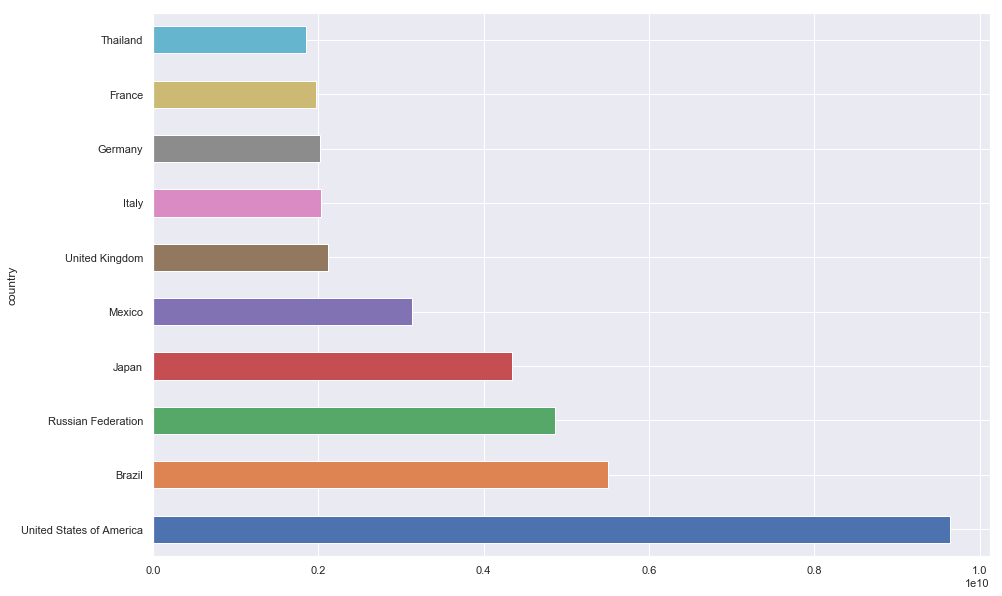

In [49]:
data.groupby(['country']).population.sum().nlargest(10).plot(kind='barh')

/Users/arslanaliawan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


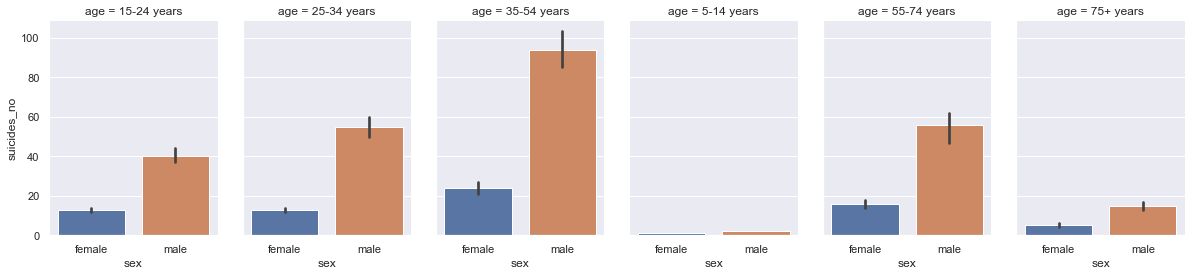

In [50]:
ax = sns.catplot(x="sex", y="suicides_no",col='age', data=data, estimator=median,height=4, aspect=.7,kind='bar')

In [51]:
data.groupby(by=['age','sex'])['suicides_no'].sum().unstack().reset_index().melt(id_vars='age')

,age,sex,value
0,15-24 years,female,221737.0
1,25-34 years,female,258022.0
2,35-54 years,female,609011.0
3,5-14 years,female,20644.0
4,55-74 years,female,529023.0
5,75+ years,female,263835.0
6,15-24 years,male,762550.0
7,25-34 years,male,1109311.0
8,35-54 years,male,2286377.0
9,5-14 years,male,42668.0


/Users/arslanaliawan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


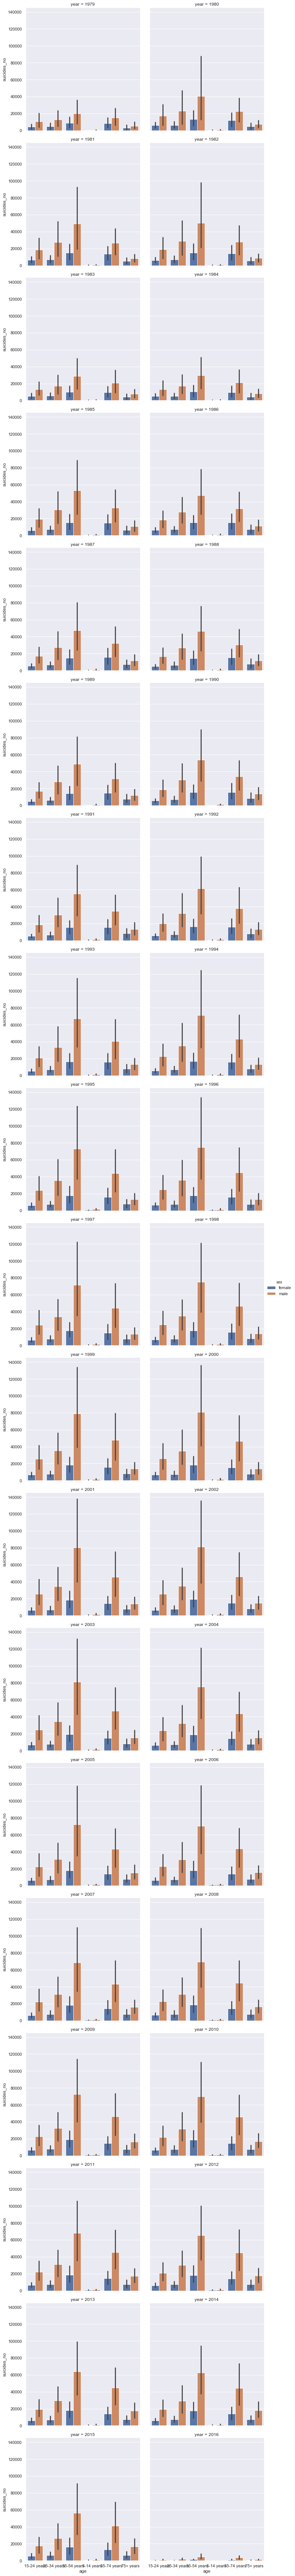

In [52]:
sns.catplot('age','suicides_no',hue ='sex', col ='year',data =data , kind = 'bar',col_wrap=2,estimator=sum)

In [53]:
data.groupby(by=['year','age']).suicides_no.sum().reset_index()

,year,age,suicides_no
0,1979,15-24 years,14701.0
1,1979,25-34 years,17149.0
2,1979,35-54 years,28614.0
3,1979,5-14 years,635.0
4,1979,55-74 years,23270.0
5,1979,75+ years,8421.0
6,1980,15-24 years,23121.0
7,1980,25-34 years,29358.0
8,1980,35-54 years,53525.0
9,1980,5-14 years,999.0


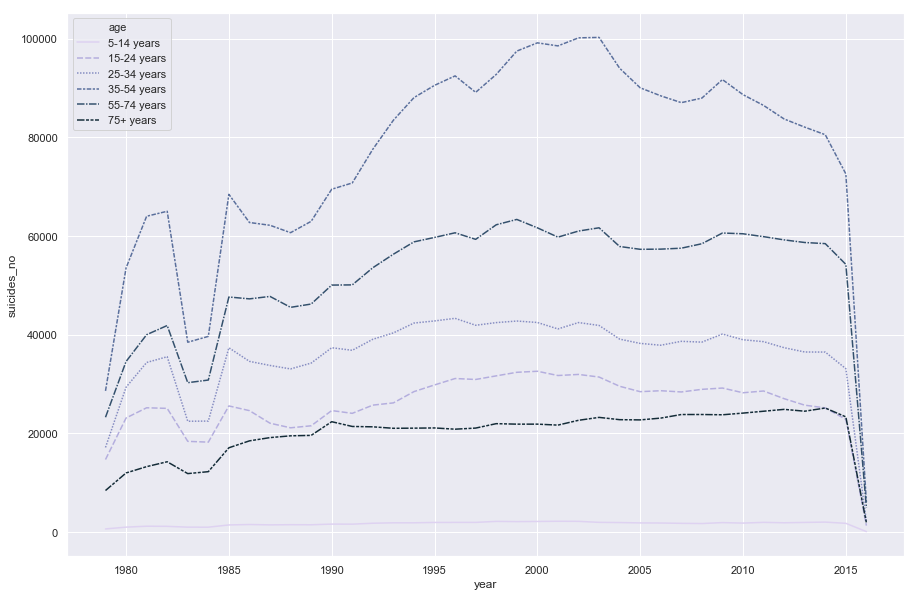

In [54]:

df = data.groupby(by = ['year','age']).suicides_no.sum().reset_index()
df['age'] = df.age.astype(pd.api.types.CategoricalDtype(categories = ['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years']))
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot('year','suicides_no',hue='age',style='age',data=df,hue_norm=LogNorm(),palette="ch:2.5,.25",sort=False)